In [1]:
# importaion of required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
Syngas_Production = pd.read_excel('Syngas Production.xlsx')

In [3]:
Syngas_Production.head(6)

,Cellulose,Hemicellulose,Temperature,Pressure,Equivalence_ratio,Steam_to_biomass_ratio,Superficial_gas_velocity,H2,CO,CO2,CH4,Lower_heating_value,Char_yield,Tar_yield
0,0.539631,0.492339,0.423196,761.215,0.544843,2.038260,7.047270,35.72,31.07,17.28,9.16,11.89,24.63,46.82
1,0.452778,0.444818,0.288383,848.612,0.658899,0.595013,3.013250,12.45,22.48,18.64,16.33,10.68,10.92,27.41
2,0.473487,0.295185,0.395243,716.512,0.158468,7.010390,3.693690,54.27,12.01,30.00,5.17,12.58,17.56,70.52
3,0.365265,0.408566,0.450695,720.367,0.667959,5.942670,8.241490,21.11,46.25,5.19,21.44,11.27,35.07,81.73
4,0.547817,0.492339,0.227477,657.823,0.451310,0.134770,0.207019,11.38,48.03,4.13,21.36,12.49,6.89,10.45
5,0.318742,0.237730,0.453647,862.407,0.485060,6.276020,2.874140,19.92,36.59,15.47,13.21,10.14,23.41,59.14


In [46]:
Syngas_Production.isnull().sum()

Cellulose                   0
Hemicellulose               0
Temperature                 0
Pressure                    0
Equivalence_ratio           0
Steam_to_biomass_ratio      0
Superficial_gas_velocity    0
H2                          0
CO                          0
CO2                         0
CH4                         0
Lower_heating_value         0
Char_yield                  0
Tar_yield                   0
dtype: int64

In [47]:
Syngas_Production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cellulose                 336 non-null    float64
 1   Hemicellulose             336 non-null    float64
 2   Temperature               336 non-null    float64
 3   Pressure                  336 non-null    float64
 4   Equivalence_ratio         336 non-null    float64
 5   Steam_to_biomass_ratio    336 non-null    float64
 6   Superficial_gas_velocity  336 non-null    float64
 7   H2                        336 non-null    float64
 8   CO                        336 non-null    float64
 9   CO2                       336 non-null    float64
 10  CH4                       336 non-null    float64
 11  Lower_heating_value       336 non-null    float64
 12  Char_yield                336 non-null    float64
 13  Tar_yield                 336 non-null    float64
dtypes: float64

In [4]:
# Displaying the basic statistics of the dataset
Syngas_Production.describe()

,Cellulose,Hemicellulose,Temperature,Pressure,Equivalence_ratio,Steam_to_biomass_ratio,Superficial_gas_velocity,H2,CO,CO2,CH4,Lower_heating_value,Char_yield,Tar_yield
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.411301,0.521836,0.328265,767.525753,0.444849,3.602405,4.730038,35.336280,19.940714,26.906994,12.912321,11.548274,24.244405,64.297262
std,0.095946,0.248088,0.109631,91.427814,0.265935,2.416866,2.594396,16.821877,10.791129,14.740403,6.541981,0.850544,11.354473,36.182685
min,0.222050,0.073828,0.108343,600.219000,0.027920,0.030611,0.040268,10.390000,5.600000,4.130000,3.340000,10.090000,5.440000,5.130000
25%,0.338137,0.310960,0.238924,704.858000,0.197084,1.421270,2.936107,19.687500,10.330000,16.712500,6.850000,10.852500,15.120000,33.665000
50%,0.419695,0.499088,0.353981,765.813000,0.438525,3.453840,4.691800,33.970000,18.480000,23.370000,12.430000,11.530000,23.540000,59.930000
75%,0.491013,0.748991,0.406687,853.521500,0.689239,5.862350,7.004350,52.080000,27.567500,35.477500,18.170000,12.270000,34.370000,94.872500
max,0.556265,0.971161,0.497960,899.703000,0.847685,7.998940,9.404340,62.800000,48.550000,57.060000,27.520000,13.340000,44.460000,133.820000


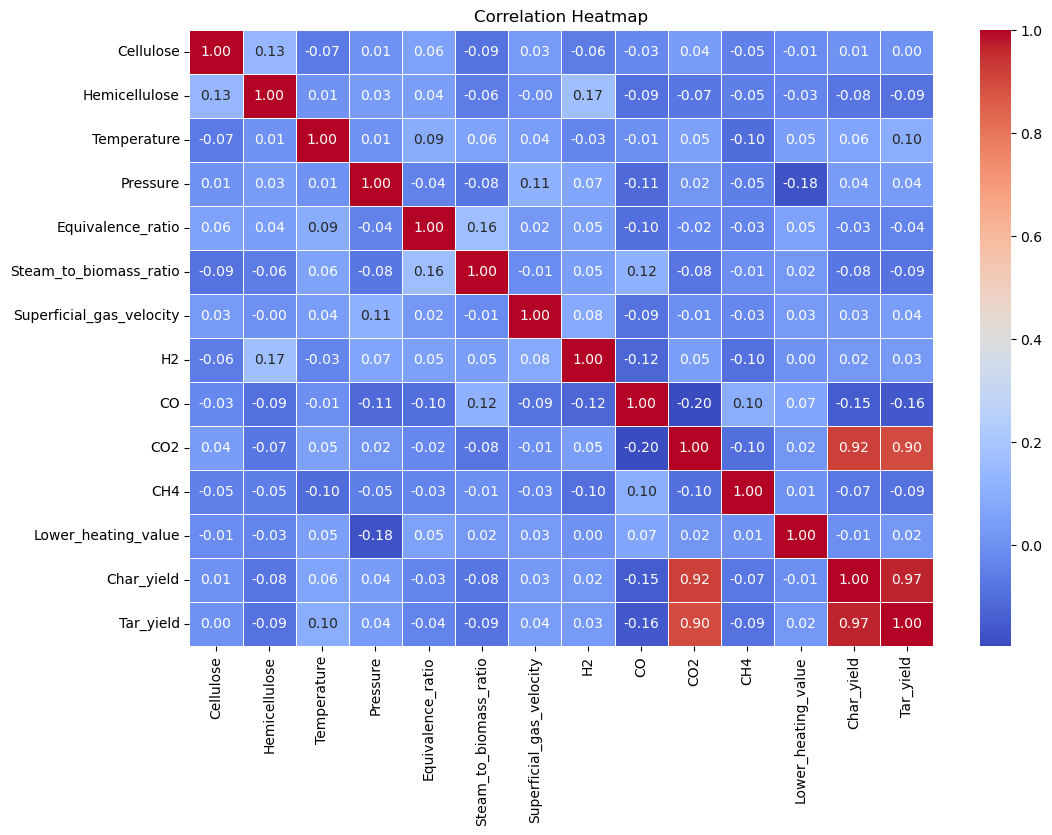

In [5]:
# Correlation heatmap for input and output variables
corr_matrix = Syngas_Production.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Separatation of the input features (X) and output variables (y)
X = Syngas_Production[['Cellulose', 'Hemicellulose', 'Temperature', 'Pressure', 'Equivalence_ratio',
        'Steam_to_biomass_ratio', 'Superficial_gas_velocity']]
y = Syngas_Production[['H2', 'CO', 'CO2', 'CH4', 'Lower_heating_value', 'Char_yield', 'Tar_yield']]

In [8]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialization of the RandomForestRegressor 
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

In [10]:
# Training the model on the training set
rf_model.fit(X_train, y_train)
# Making predictions on the test set
y_pred = rf_model.predict(X_test)

In [23]:
# Evaluation of the model
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')  
r2 = r2_score(y_test, y_pred, multioutput='raw_values')
# Printing the results
for column_label in y_test.columns:
    i = y_test.columns.get_loc(column_label)
    print(f"Output {i + 1} ({column_label}):")
    print(f'Mean Squared Error: {mse[i]}')
    print(f'R-squared: {r2[i]}')
    print()

Output 1 (H2):
Mean Squared Error: 304.85421708143036
R-squared: 0.0011204986979536091

Output 2 (CO):
Mean Squared Error: 143.31612745957224
R-squared: -0.03353155688902065

Output 3 (CO2):
Mean Squared Error: 222.6416345394168
R-squared: 0.021633951803915474

Output 4 (CH4):
Mean Squared Error: 41.19170794584016
R-squared: -0.024096289827765682

Output 5 (Lower_heating_value):
Mean Squared Error: 0.7505269169030137
R-squared: -0.02464754675445202

Output 6 (Char_yield):
Mean Squared Error: 129.30911829506064
R-squared: 0.021087362167440005

Output 7 (Tar_yield):
Mean Squared Error: 1211.3409368674836
R-squared: 0.0517376618906058



In [32]:
# KNN model

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [25]:
# Initialization of the KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)

# Training the model on the training set
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [26]:
# Making predictions on the test set
y_pred_knn = knn_model.predict(X_test)

In [27]:
# Evaluation of the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn, multioutput='raw_values')  
r2_knn = r2_score(y_test, y_pred_knn, multioutput='raw_values')

# Printing the results for KNN
for column_label in y_test.columns:
    i = y_test.columns.get_loc(column_label)
    print(f"Output {i + 1} ({column_label}) - KNN:")
    print(f'Mean Squared Error: {mse_knn[i]}')
    print(f'R-squared: {r2_knn[i]}')
    print()

Output 1 (H2) - KNN:
Mean Squared Error: 366.764640882353
R-squared: -0.2017340126934548

Output 2 (CO) - KNN:
Mean Squared Error: 151.92095864705877
R-squared: -0.09558573551925797

Output 3 (CO2) - KNN:
Mean Squared Error: 234.99119352941173
R-squared: -0.032634376089925476

Output 4 (CH4) - KNN:
Mean Squared Error: 52.20031311764705
R-squared: -0.2977890371022742

Output 5 (Lower_heating_value) - KNN:
Mean Squared Error: 0.7224977058823531
R-squared: 0.013618985281858786

Output 6 (Char_yield) - KNN:
Mean Squared Error: 139.36665105882355
R-squared: -0.05505147519897813

Output 7 (Tar_yield) - KNN:
Mean Squared Error: 1331.7094975882349
R-squared: -0.04248929713472838



In [33]:
# multiple output (MIMO) regression model

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Initialization of the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
# MultiOutputRegressor wrapper for RandomForestRegressor
mimo_model = MultiOutputRegressor(rf_regressor)

In [36]:
# Training the model on the training set
mimo_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=10,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=200,
                                                     random_state=42))

In [37]:
# Making predictions on the test set
y_pred_mimo = mimo_model.predict(X_test)

In [38]:
# Evaluation of the MIMO model
mse_mimo = mean_squared_error(y_test, y_pred_mimo, multioutput='raw_values')  
r2_mimo = r2_score(y_test, y_pred_mimo, multioutput='raw_values')
# Printing the results for MIMO
for i, column_label in enumerate(y_test.columns):
    print(f"Output {i + 1} ({column_label}) - MIMO:")
    print(f'Mean Squared Error: {mse_mimo[i]}')
    print(f'R-squared: {r2_mimo[i]}')
    print()

Output 1 (H2) - MIMO:
Mean Squared Error: 291.1997343685016
R-squared: 0.045860515790072554

Output 2 (CO) - MIMO:
Mean Squared Error: 147.5652991115843
R-squared: -0.06417467480491279

Output 3 (CO2) - MIMO:
Mean Squared Error: 223.0118405664262
R-squared: 0.020007135649727448

Output 4 (CH4) - MIMO:
Mean Squared Error: 44.82535270774922
R-squared: -0.11443491147744056

Output 5 (Lower_heating_value) - MIMO:
Mean Squared Error: 0.7096001074311803
R-squared: 0.031227271293173042

Output 6 (Char_yield) - MIMO:
Mean Squared Error: 130.40258553554722
R-squared: 0.012809454817351185

Output 7 (Tar_yield) - MIMO:
Mean Squared Error: 1260.490728243451
R-squared: 0.013262204924469723



In [39]:
import matplotlib.pyplot as plt

In [41]:
# Defining the number of output variables
num_outputs = y_test.shape[1]

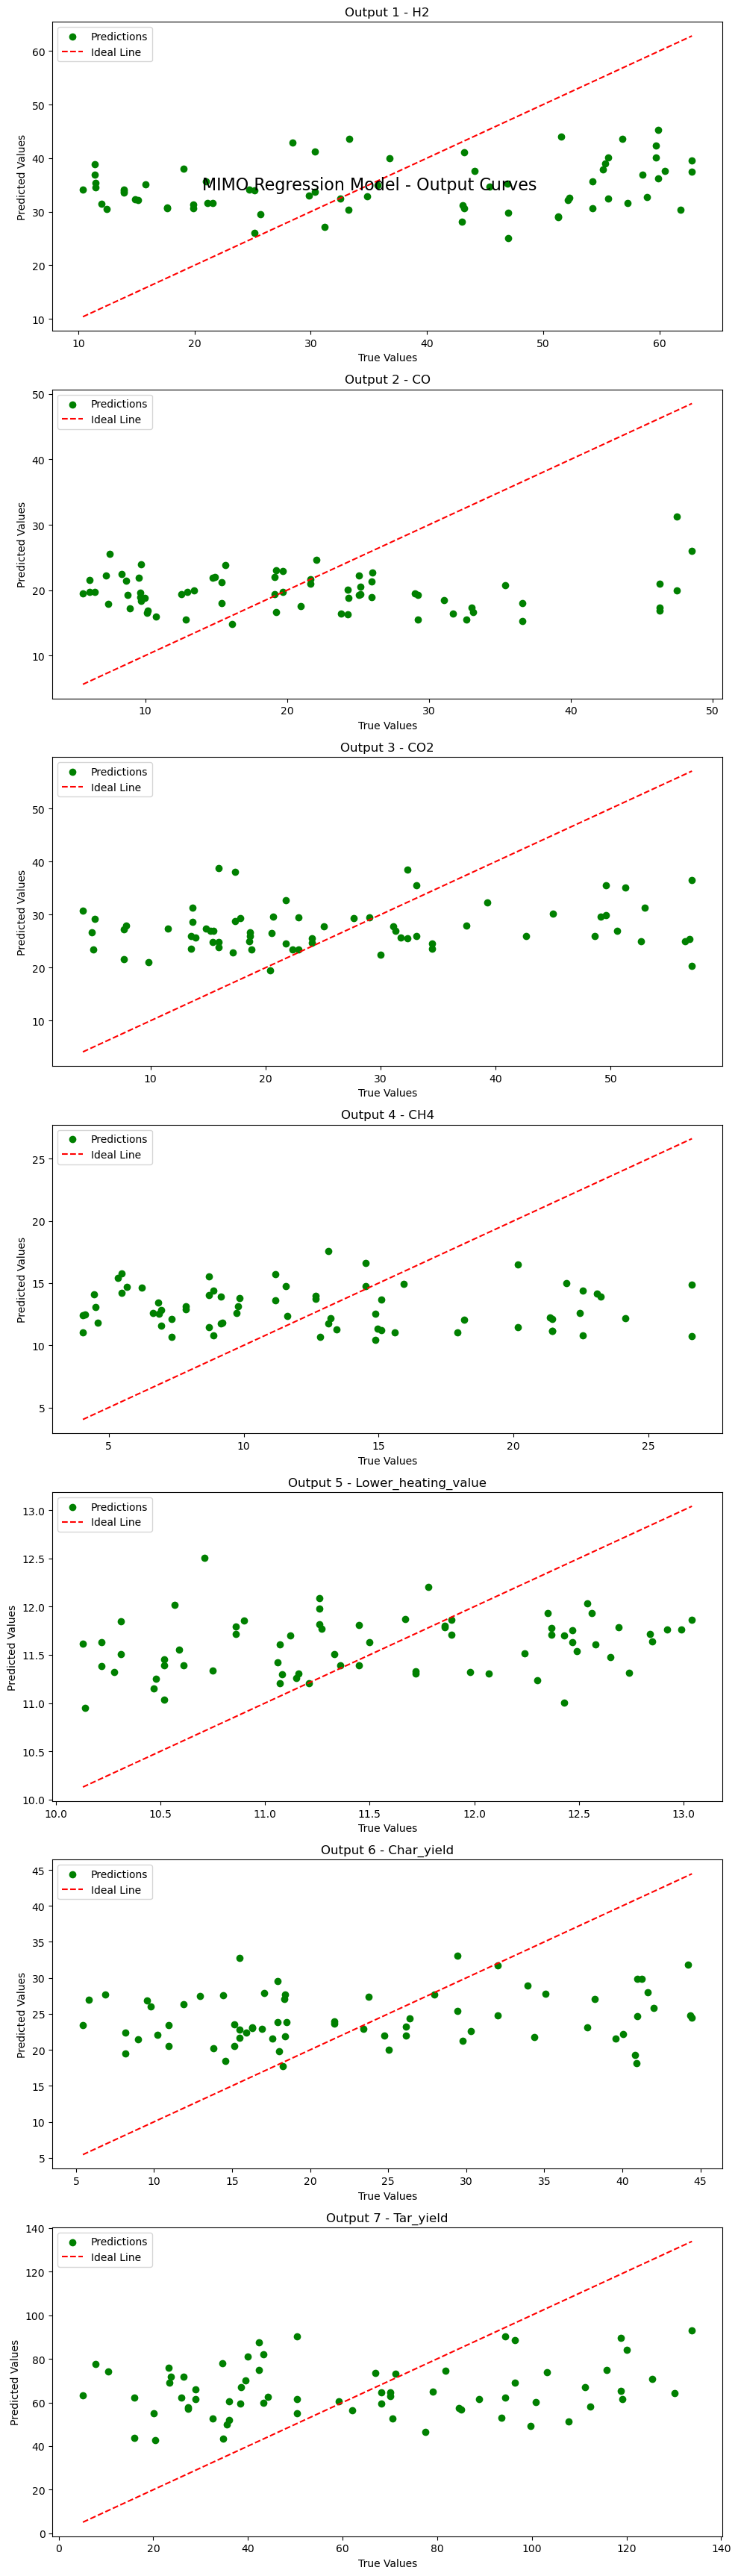

In [45]:
# Creating the subplots for each output variable
fig, axes = plt.subplots(num_outputs, 1, figsize=(10, 5 * num_outputs))
fig.suptitle('MIMO Regression Model - Output Curves', y=0.92, fontsize=16)
# Plotting output curves
for i, ax in enumerate(axes):
    true_values = y_test.iloc[:, i]
    predicted_values = y_pred_mimo[:, i]
    ax.scatter(true_values, predicted_values, color='green', label='Predictions')
    ax.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], linestyle='--', color='red', label='Ideal Line')
    ax.set_title(f'Output {i + 1} - {y_test.columns[i]}')
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()
plt.tight_layout()
plt.show()